Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

file = "/fraudTrain.csv"
dat = pd.read_csv(path + file)

Path to dataset files: /Users/anabellafalk/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


View Data

In [9]:
dat.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
dat.shape

(1296674, 23)

In [10]:
dat.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [3]:
dat = dat.drop('Unnamed: 0', axis = 1)

In [34]:
dat.shape

(1296675, 22)

## Split into Training and Validation

In [4]:
n_cc = dat["cc_num"].nunique()
print("Numer of unique cc #s: " + str(n_cc))

Numer of unique cc #s: 983


In [5]:
# Randomly sample cc #s for validation
np.random.seed(42)  # set seed
unique_cc = dat["cc_num"].unique()
cc_val = np.random.choice(unique_cc, size = int(0.3 * n_cc))

In [6]:
# Split data
dat_val = dat[dat["cc_num"].isin(cc_val)]
dat_tr = dat[~dat["cc_num"].isin(cc_val)]

In [38]:
print("Shape of validation set: " + str(dat_val.shape))
print("Shape of training set: " + str(dat_tr.shape))

Shape of validation set: (319622, 22)
Shape of training set: (977053, 22)


In [8]:
# Check proportion in validation
dat_val.shape[0] / dat.shape[0]

0.2464935315325737

In [15]:
fraud_counts_tr = dat_tr['is_fraud'].value_counts()
fraud_counts_val = dat_val['is_fraud'].value_counts()

print("Training fraud counts:")
print(fraud_counts_tr)
print("\n")
print("Validation fraud counts:")
print(fraud_counts_val)

Training fraud counts:
0    971432
1      5621
Name: is_fraud, dtype: int64


Validation fraud counts:
0    317737
1      1885
Name: is_fraud, dtype: int64


In [20]:
print("Proportion of training data that are fraud: " + str(round(fraud_counts_tr[1]/fraud_counts_tr[0], ndigits = 4)))
print("Proportion of validation data that are fraud: " + str(round(fraud_counts_val[1]/fraud_counts_val[0], ndigits = 4)))

Proportion of training data that are fraud: 0.0058
Proportion of validation data that are fraud: 0.0059


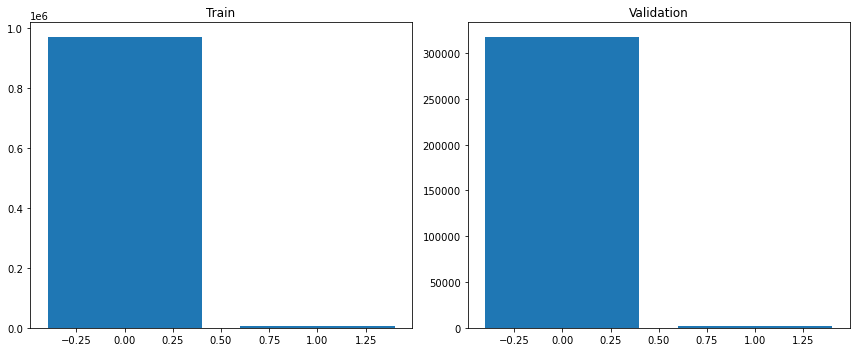

In [ ]:
# Check distribution of target in training and validation
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Two plots side by side

axs[0].bar(fraud_counts_tr.index, fraud_counts_tr.values)
axs[0].set_title('Train')

axs[1].bar(fraud_counts_val.index, fraud_counts_val.values)
axs[1].set_title('Validation')

plt.tight_layout()
plt.show()

## Explore Predictor Variables

Check number of years

In [48]:
type(dat_tr['trans_date_trans_time'][0])

str

In [53]:
dat_tr['trans_year'] = dat_tr['trans_date_trans_time'].apply(lambda x: x[:4])

/var/folders/4s/wcc0tbwn4_149r662n1p67x80000gp/T/ipykernel_21458/1991342242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_tr['trans_year'] = dat_tr['trans_date_trans_time'].apply(lambda x: x[:4])


In [54]:
dat_tr['trans_year']

0          2019
2          2019
3          2019
5          2019
6          2019
           ... 
1296669    2020
1296670    2020
1296671    2020
1296673    2020
1296674    2020
Name: trans_year, Length: 977053, dtype: object

In [58]:
dat_tr['trans_year'].value_counts()

2019    696732
2020    280321
Name: trans_year, dtype: int64

Explore data per cc_num

In [38]:
dat_tr['cc_num'].nunique()

739

In [40]:
dat_tr.shape[0]

977053

In [43]:
print("Mean number of rows per cc_num: " + str(dat_tr.shape[0]/dat_tr['cc_num'].nunique()))

Mean number of rows per cc_num: 1322.128552097429


In [37]:
example_card = dat_tr[dat_tr['cc_num'] == 2703186189652095]
print(example_card.shape)
example_card.head()

(2028, 22)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1565,2019-01-01 16:53:34,2703186189652095,fraud_Ruecker-Mayert,kids_pets,114.79,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,fadb4dafef079a1a0381360bbe80b3c0,1325436814,35.083586,-80.625951,0
2299,2019-01-01 23:02:37,2703186189652095,fraud_Pacocha-Weissnat,kids_pets,16.55,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1318500aff9644abe2e4a8c562eab7bc,1325458957,35.532409,-82.170017,0
3606,2019-01-03 01:40:38,2703186189652095,fraud_Kuhn LLC,misc_net,27.70,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,bcc4f7493418d8937162bfec626216cc,1325554838,35.315851,-80.666723,0
4227,2019-01-03 15:24:11,2703186189652095,"fraud_Nicolas, Hills and McGlynn",entertainment,43.72,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0f63b8ad4ac9bc6b77e60197ffa6aa24,1325604251,36.956094,-80.343520,0


Check if following variables are consistent between each cc_num

In [60]:
identity_cols = ['first', 'last', 'gender', 'dob']
territory_cols = ['street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop']
career_cols = ['job']

In [ ]:
# Aggregate data by cc_num then check identity is the same
dat_tr.groupby('cc_num')[identity_cols].nunique()

,first,last,gender,dob
cc_num,,,,
60422928733,1,1,1,1
60423098130,1,1,1,1
60427851591,1,1,1,1
501802953619,1,1,1,1
501818133297,1,1,1,1
...,...,...,...,...
4911818930706644725,1,1,1,1
4956828990005111019,1,1,1,1
4958589671582726883,1,1,1,1


In [67]:
(dat_tr.groupby('cc_num')[identity_cols].nunique()[identity_cols] == 1).all()

first     True
last      True
gender    True
dob       True
dtype: bool

In [ ]:
# Aggregate data by cc_num then check territory is the same
dat_tr.groupby('cc_num')[territory_cols].nunique()

,street,city,state,zip,lat,long,city_pop
cc_num,,,,,,,
60422928733,1,1,1,1,1,1,1
60423098130,1,1,1,1,1,1,1
60427851591,1,1,1,1,1,1,1
501802953619,1,1,1,1,1,1,1
501818133297,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
4911818930706644725,1,1,1,1,1,1,1
4956828990005111019,1,1,1,1,1,1,1
4958589671582726883,1,1,1,1,1,1,1


In [69]:
(dat_tr.groupby('cc_num')[territory_cols].nunique()[territory_cols] == 1).all()

street      True
city        True
state       True
zip         True
lat         True
long        True
city_pop    True
dtype: bool

In [70]:
# Aggregate data by cc_num then check career is the same
dat_tr.groupby('cc_num')[career_cols].nunique()

,job
cc_num,
60422928733,1
60423098130,1
60427851591,1
501802953619,1
501818133297,1
...,...
4911818930706644725,1
4956828990005111019,1
4958589671582726883,1


In [71]:
(dat_tr.groupby('cc_num')[career_cols].nunique()[career_cols] == 1).all()

job    True
dtype: bool

We know that each credit card is owned by the same person. Therefore, any demographic information about the owner, including information on their identity, geographical surrounding, or career are consistent between each credit card number. Instead of analyzing each credit card individually, we can find broader information, like geographic info, to give some information on the credit card owner to help determine fraud. Using broader information will prevent the model from fitting to specific individuals, but instead fit to groups of individuals categorized by some characteristic. We must be careful choosing this characteristic to avoid bias and discimination towards a certain group of people.

### Variables that may need binning

#### Merchant Variables

In [26]:
dat_tr['merchant'].nunique()

693

In [27]:
dat_tr['category'].nunique()

14

In [28]:
dat_tr.loc[:10, ['merchant', 'category']]

,merchant,category
0,"fraud_Rippin, Kub and Mann",misc_net
2,fraud_Lind-Buckridge,entertainment
3,"fraud_Kutch, Hermiston and Farrell",gas_transport
5,"fraud_Stroman, Hudson and Erdman",gas_transport
6,fraud_Rowe-Vandervort,grocery_net
7,fraud_Corwin-Collins,gas_transport
8,fraud_Herzog Ltd,misc_pos
9,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos
10,fraud_Rutherford-Mertz,grocery_pos


In [29]:
dat_tr['category'].unique()

array(['misc_net', 'entertainment', 'gas_transport', 'grocery_net',
       'misc_pos', 'grocery_pos', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

#### Territory Variables

In [30]:
dat_tr['street'].nunique()

739

In [31]:
dat_tr['city'].nunique()

678

In [32]:
dat_tr['zip'].nunique()

731

In [33]:
dat_tr['state'].nunique()

50

#### Other

In [24]:
dat_tr['job'].nunique()

426

In [72]:
dat_tr.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_year'],
      dtype='object')

Identity  \
    drop: first, last \
    further analysis: gender, dob -> age 

Territory \
    drop: street, zip \
    further analysis: long/lat -> distance from merchant, city pop, state, city -> county? 
      
Career \
    further analysis: job -> categorize type of job

### Identity

#### Gender

Look at Distribution of Fraud between Genders

In [109]:
count_gender = dat_tr['gender'].value_counts()
count_gender

F    533919
M    443134
Name: gender, dtype: int64

In [117]:
fraud_gender = dat_tr.groupby('gender')['is_fraud'].value_counts(normalize = True)
fraud_gender

gender  is_fraud
F       0           0.994812
        1           0.005188
M       0           0.993566
        1           0.006434
Name: is_fraud, dtype: float64

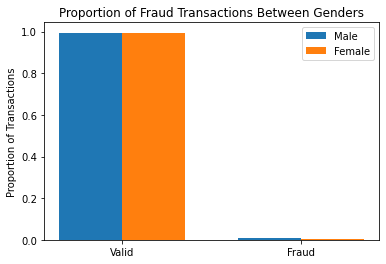

In [118]:
x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fraud_gender[2:], width, label='Male')
rects2 = ax.bar(x + width/2, fraud_gender[:2], width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of Transactions')
ax.set_title('Proportion of Fraud Transactions Between Genders')
ax.set_xticks(x)
ax.set_xticklabels(['Valid', 'Fraud'])
ax.legend()

plt.show()

Appears to be no significant difference between genders

#### Age

Look at Distribution of Fraud over Ages

In [95]:
dat_tr['trans_date'] = pd.to_datetime(dat_tr['trans_date_trans_time'].apply(lambda x: x[:10]))
dat_tr['trans_date']

/var/folders/4s/wcc0tbwn4_149r662n1p67x80000gp/T/ipykernel_21458/2717249210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_tr['trans_date'] = pd.to_datetime(dat_tr['trans_date_trans_time'].apply(lambda x: x[:10]))


0         2019-01-01
2         2019-01-01
3         2019-01-01
5         2019-01-01
6         2019-01-01
             ...    
1296669   2020-06-21
1296670   2020-06-21
1296671   2020-06-21
1296673   2020-06-21
1296674   2020-06-21
Name: trans_date, Length: 977053, dtype: datetime64[ns]

In [94]:
dat_tr['dob'] = pd.to_datetime(dat_tr['dob'])
dat_tr['dob']

/var/folders/4s/wcc0tbwn4_149r662n1p67x80000gp/T/ipykernel_21458/1938366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_tr['dob'] = pd.to_datetime(dat_tr['dob'])


0         1988-03-09
2         1962-01-19
3         1967-01-12
5         1961-06-19
6         1993-08-16
             ...    
1296669   1980-09-15
1296670   1961-11-24
1296671   1979-12-11
1296673   1980-08-18
1296674   1995-08-16
Name: dob, Length: 977053, dtype: datetime64[ns]

In [99]:
dat_tr['age_at_trans'] = (dat_tr['trans_date'] - dat_tr['dob']).dt.days // 365
dat_tr['age_at_trans']

/var/folders/4s/wcc0tbwn4_149r662n1p67x80000gp/T/ipykernel_21458/901124337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_tr['age_at_trans'] = (dat_tr['trans_date'] - dat_tr['dob']).dt.days // 365


0          30
2          56
3          52
5          57
6          25
           ..
1296669    39
1296670    58
1296671    40
1296673    39
1296674    24
Name: age_at_trans, Length: 977053, dtype: int64

In [100]:
dat_tr['age_at_trans'].nunique()

82

In [103]:
print("Max age: " + str(dat_tr['age_at_trans'].max()))
print("Min age: " + str(dat_tr['age_at_trans'].min()))

Max age: 95
Min age: 14


In [123]:
fraud_age = dat_tr.groupby('age_at_trans')['is_fraud'].value_counts(normalize = True)
fraud_age

age_at_trans  is_fraud
14            0           0.997929
              1           0.002071
15            0           0.996911
              1           0.003089
16            0           0.993274
                            ...   
92            1           0.012226
93            0           0.974057
              1           0.025943
94            0           1.000000
95            0           1.000000
Name: is_fraud, Length: 162, dtype: float64

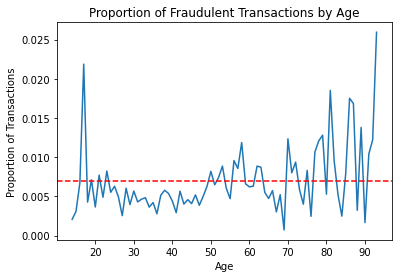

In [140]:
plt.plot(fraud_age.loc[:, 1])
plt.title('Proportion of Fraudulent Transactions by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Transactions')

plt.axhline(y=fraud_age.loc[:, 1].mean(), color='r', linestyle='--', label='Average')

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


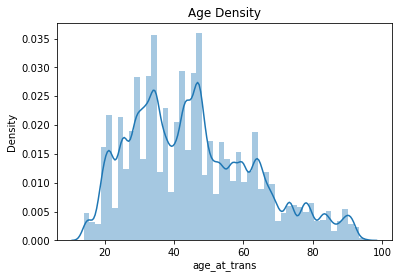

In [156]:
sns.distplot(dat_tr['age_at_trans'])
plt.title('Age Density')
plt.show()

Difference in proportions between age may be dependent on the number of observations for each age.

### Territory

#### City Population

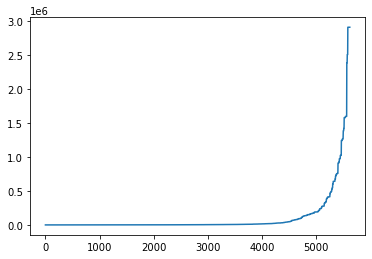

In [172]:
plt.plot(dat_tr[dat_tr['is_fraud'] == 1]['city_pop'].sort_values().values)

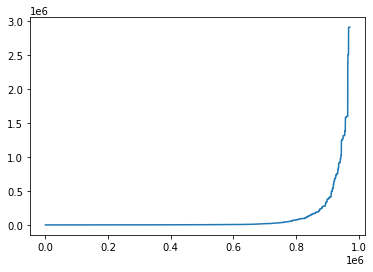

In [173]:
plt.plot(dat_tr[dat_tr['is_fraud'] == 0]['city_pop'].sort_values().values)

#### Distance

#### State

long/lat -> distance from merchant, city pop, state, city -> county? 